In [28]:
from torchvision.utils import save_image
from torchvision.io import read_image
import torchvision.transforms as T
import pandas as pd
import os
import torchvision
from tqdm import tqdm

from scipy.spatial import distance
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

(-0.5, 511.5, 383.5, -0.5)

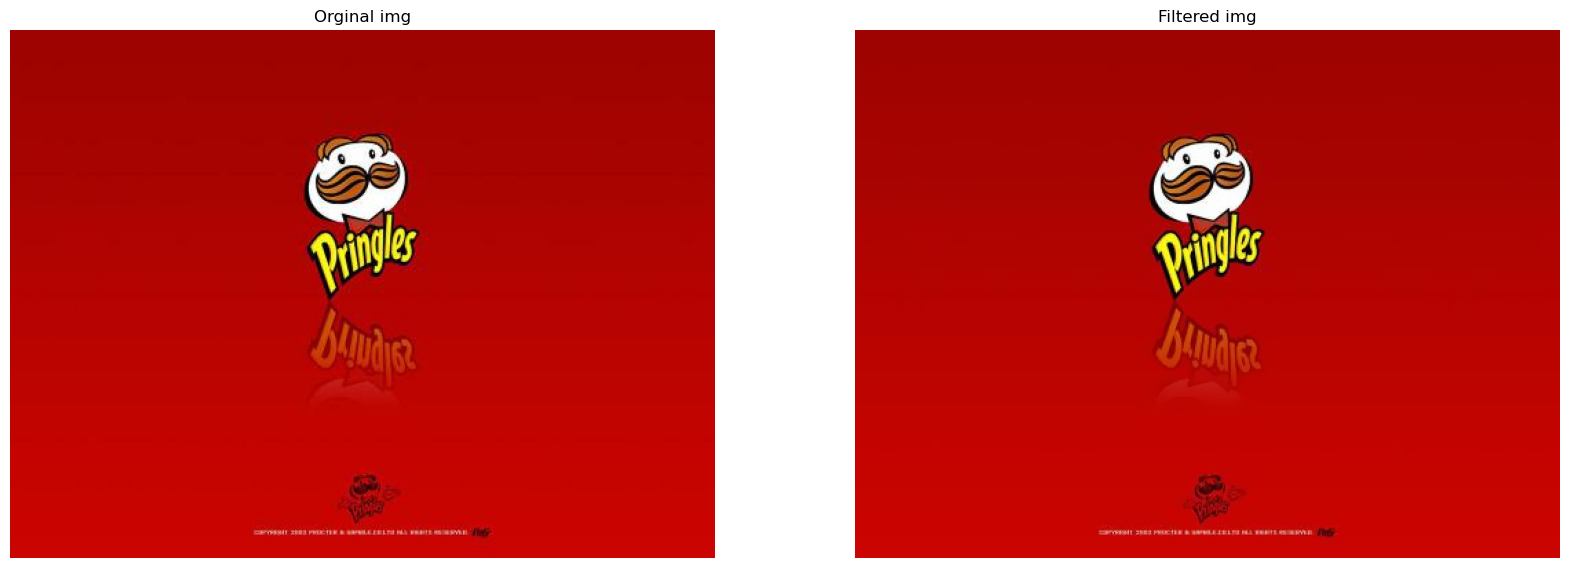

In [23]:
image1_path = '../data/processed/images/train/119863.jpg'

img = cv2.imread(image1_path)
bilateral = cv2.bilateralFilter(img, 9, 9, 9)
bilateral = cv2.bilateralFilter(bilateral, 9, 9, 9)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,12))
ax1.set_title("Orginal img")
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax2.set_title("Filtered img")
ax2.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
ax2.axis('off')

In [25]:
train = pd.read_csv("../data/processed/train.csv")
val = pd.read_csv("../data/processed/val.csv")
test = pd.read_csv("../data/processed/test.csv")

In [26]:
image1_path = '../data/processed/images/train/119863.jpg'

img = cv2.imread(image1_path)
bilateral = cv2.bilateralFilter(img, 9, 9, 9)
bilateral = cv2.bilateralFilter(bilateral, 9, 9, 9)
cv2.imwrite("abs.jpg", bilateral)

True

In [33]:
updated_data_dir = "../data/processed/images/train/"
for idx, row in tqdm(train.iterrows()):
    im = read_image(os.path.join(updated_data_dir, row.Path), mode=torchvision.io.ImageReadMode.RGB)
    im = T.Resize(size=(384, 384))(im)
    save_image(im/255., f"../data/processed/pre_proc_images/train/{row.Path.split('/')[-1]}")

11135it [04:18, 43.05it/s]


In [34]:
updated_data_dir = "../data/processed/images/test/"
for idx, row in tqdm(test.iterrows()):
    im = read_image(os.path.join(updated_data_dir, row.Path), mode=torchvision.io.ImageReadMode.RGB)
    im = T.Resize(size=(384, 384))(im)
    save_image(im/255., f"../data/processed/pre_proc_images/test/{row.Path.split('/')[-1]}")

3712it [01:13, 50.37it/s]


In [35]:
updated_data_dir = "../data/processed/images/val/"
for idx, row in tqdm(val.iterrows()):
    im = read_image(os.path.join(updated_data_dir, row.Path), mode=torchvision.io.ImageReadMode.RGB)
    im = T.Resize(size=(384, 384))(im)
    save_image(im/255., f"../data/processed/pre_proc_images/val/{row.Path.split('/')[-1]}")

3712it [01:12, 51.54it/s]


In [36]:
updated_data_dir = "../data/processed/pre_proc_images/train/"
for idx, row in tqdm(train.iterrows()):    
    im = cv2.imread(os.path.join(updated_data_dir, row.Path))
    im = cv2.bilateralFilter(im, 9, 9, 9)
    im = cv2.bilateralFilter(im, 9, 9, 9)
    cv2.imwrite(f"../data/processed/pre_proc_images/train/{row.Path.split('/')[-1]}", im)

11135it [01:37, 113.67it/s]


In [37]:
updated_data_dir = "../data/processed/pre_proc_images/test/"
for idx, row in tqdm(test.iterrows()):    
    im = cv2.imread(os.path.join(updated_data_dir, row.Path))
    im = cv2.bilateralFilter(im, 9, 9, 9)
    im = cv2.bilateralFilter(im, 9, 9, 9)
    cv2.imwrite(f"../data/processed/pre_proc_images/test/{row.Path.split('/')[-1]}", im)

3712it [00:32, 114.36it/s]


In [38]:
updated_data_dir = "../data/processed/pre_proc_images/val/"
for idx, row in tqdm(val.iterrows()):    
    im = cv2.imread(os.path.join(updated_data_dir, row.Path))
    im = cv2.bilateralFilter(im, 9, 9, 9)
    im = cv2.bilateralFilter(im, 9, 9, 9)
    cv2.imwrite(f"../data/processed/pre_proc_images/val/{row.Path.split('/')[-1]}", im)

3712it [00:32, 113.49it/s]
